In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evitar cortar en varias líneas
pd.set_option('display.max_colwidth', None)  # Evitar cortar el contenido de las celdas

In [19]:
df = pd.read_csv('Medicaldataset.csv')

In [20]:
print(df.head())

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar  CK-MB  Troponin    Result
0   64       1          66                      160                        83        160.0   1.80     0.012  negative
1   21       1          94                       98                        46        296.0   6.75     1.060  positive
2   55       1          64                      160                        77        270.0   1.99     0.003  negative
3   64       1          70                      120                        55        270.0  13.87     0.122  positive
4   55       1          64                      112                        65        300.0   1.08     0.003  negative


In [21]:
print(df.describe())

               Age       Gender   Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar        CK-MB     Troponin
count  1319.000000  1319.000000  1319.000000              1319.000000               1319.000000  1319.000000  1319.000000  1319.000000
mean     56.191812     0.659591    78.336619               127.170584                 72.269143   146.634344    15.274306     0.360942
std      13.647315     0.474027    51.630270                26.122720                 14.033924    74.923045    46.327083     1.154568
min      14.000000     0.000000    20.000000                42.000000                 38.000000    35.000000     0.321000     0.001000
25%      47.000000     0.000000    64.000000               110.000000                 62.000000    98.000000     1.655000     0.006000
50%      58.000000     1.000000    74.000000               124.000000                 72.000000   116.000000     2.850000     0.014000
75%      65.000000     1.000000    85.000000           

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB
None


In [23]:
df['Result'] = df['Result'].apply(lambda x: 1 if x == 'positive' else 0 if x == 'negative' else None)

In [24]:
print(df.head())

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar  CK-MB  Troponin  Result
0   64       1          66                      160                        83        160.0   1.80     0.012       0
1   21       1          94                       98                        46        296.0   6.75     1.060       1
2   55       1          64                      160                        77        270.0   1.99     0.003       0
3   64       1          70                      120                        55        270.0  13.87     0.122       1
4   55       1          64                      112                        65        300.0   1.08     0.003       0


In [25]:
print('Columnas con filas nulas:')
print(df.isnull().sum())

Columnas con filas nulas:
Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


In [26]:
print(df.columns)

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')


In [27]:
columnas_elegidas = ['Age','CK-MB','Troponin']
for col in columnas_elegidas:
    df[col+'_log'] = np.log(df[col] + 1e-10 )
for col in columnas_elegidas:
    df[col+'_log1'] = np.log1p(df[col])

In [28]:
df['Result'] = df.pop('Result')


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Age_log                   1319 non-null   float64
 9   CK-MB_log                 1319 non-null   float64
 10  Troponin_log              1319 non-null   float64
 11  Age_log1                  1319 non-null   float64
 12  CK-MB_log1                1319 non-null   float64
 13  Troponin_log1             1319 non-null   float64
 14  Result  

Text(0.5, 1.0, 'Matriz de Correlación')

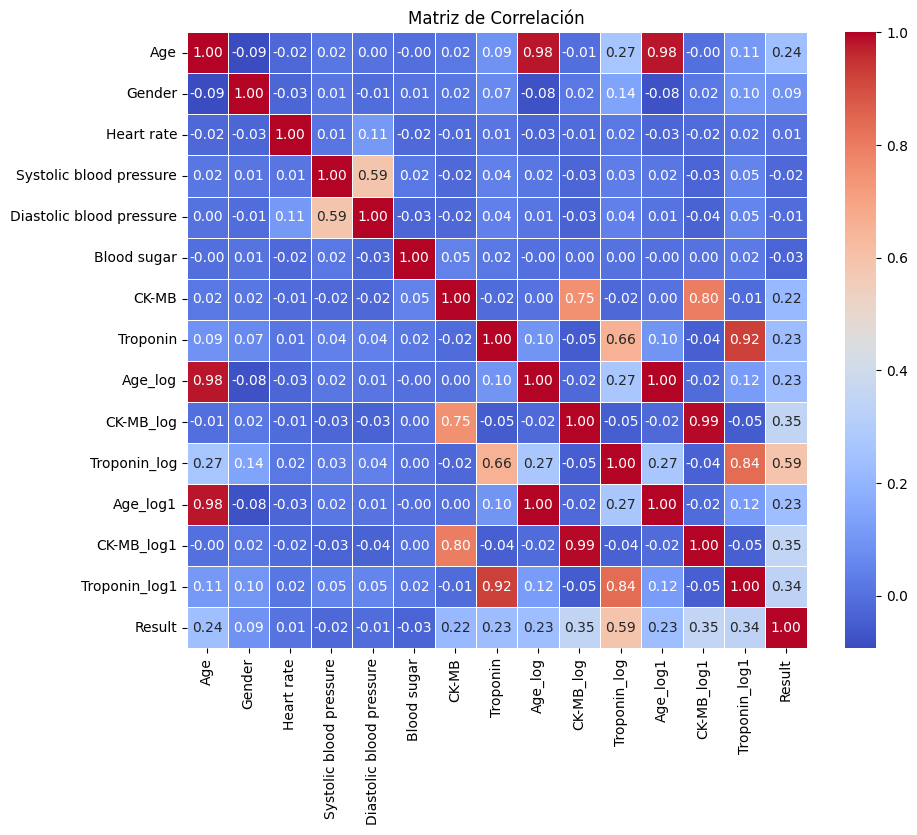

In [30]:
# Crear la matriz de correlación
matriz_correlacion = df.corr()

# matriz_correlacion = df.corr()
# mostrar la matriz de correlación con seaborn
plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")

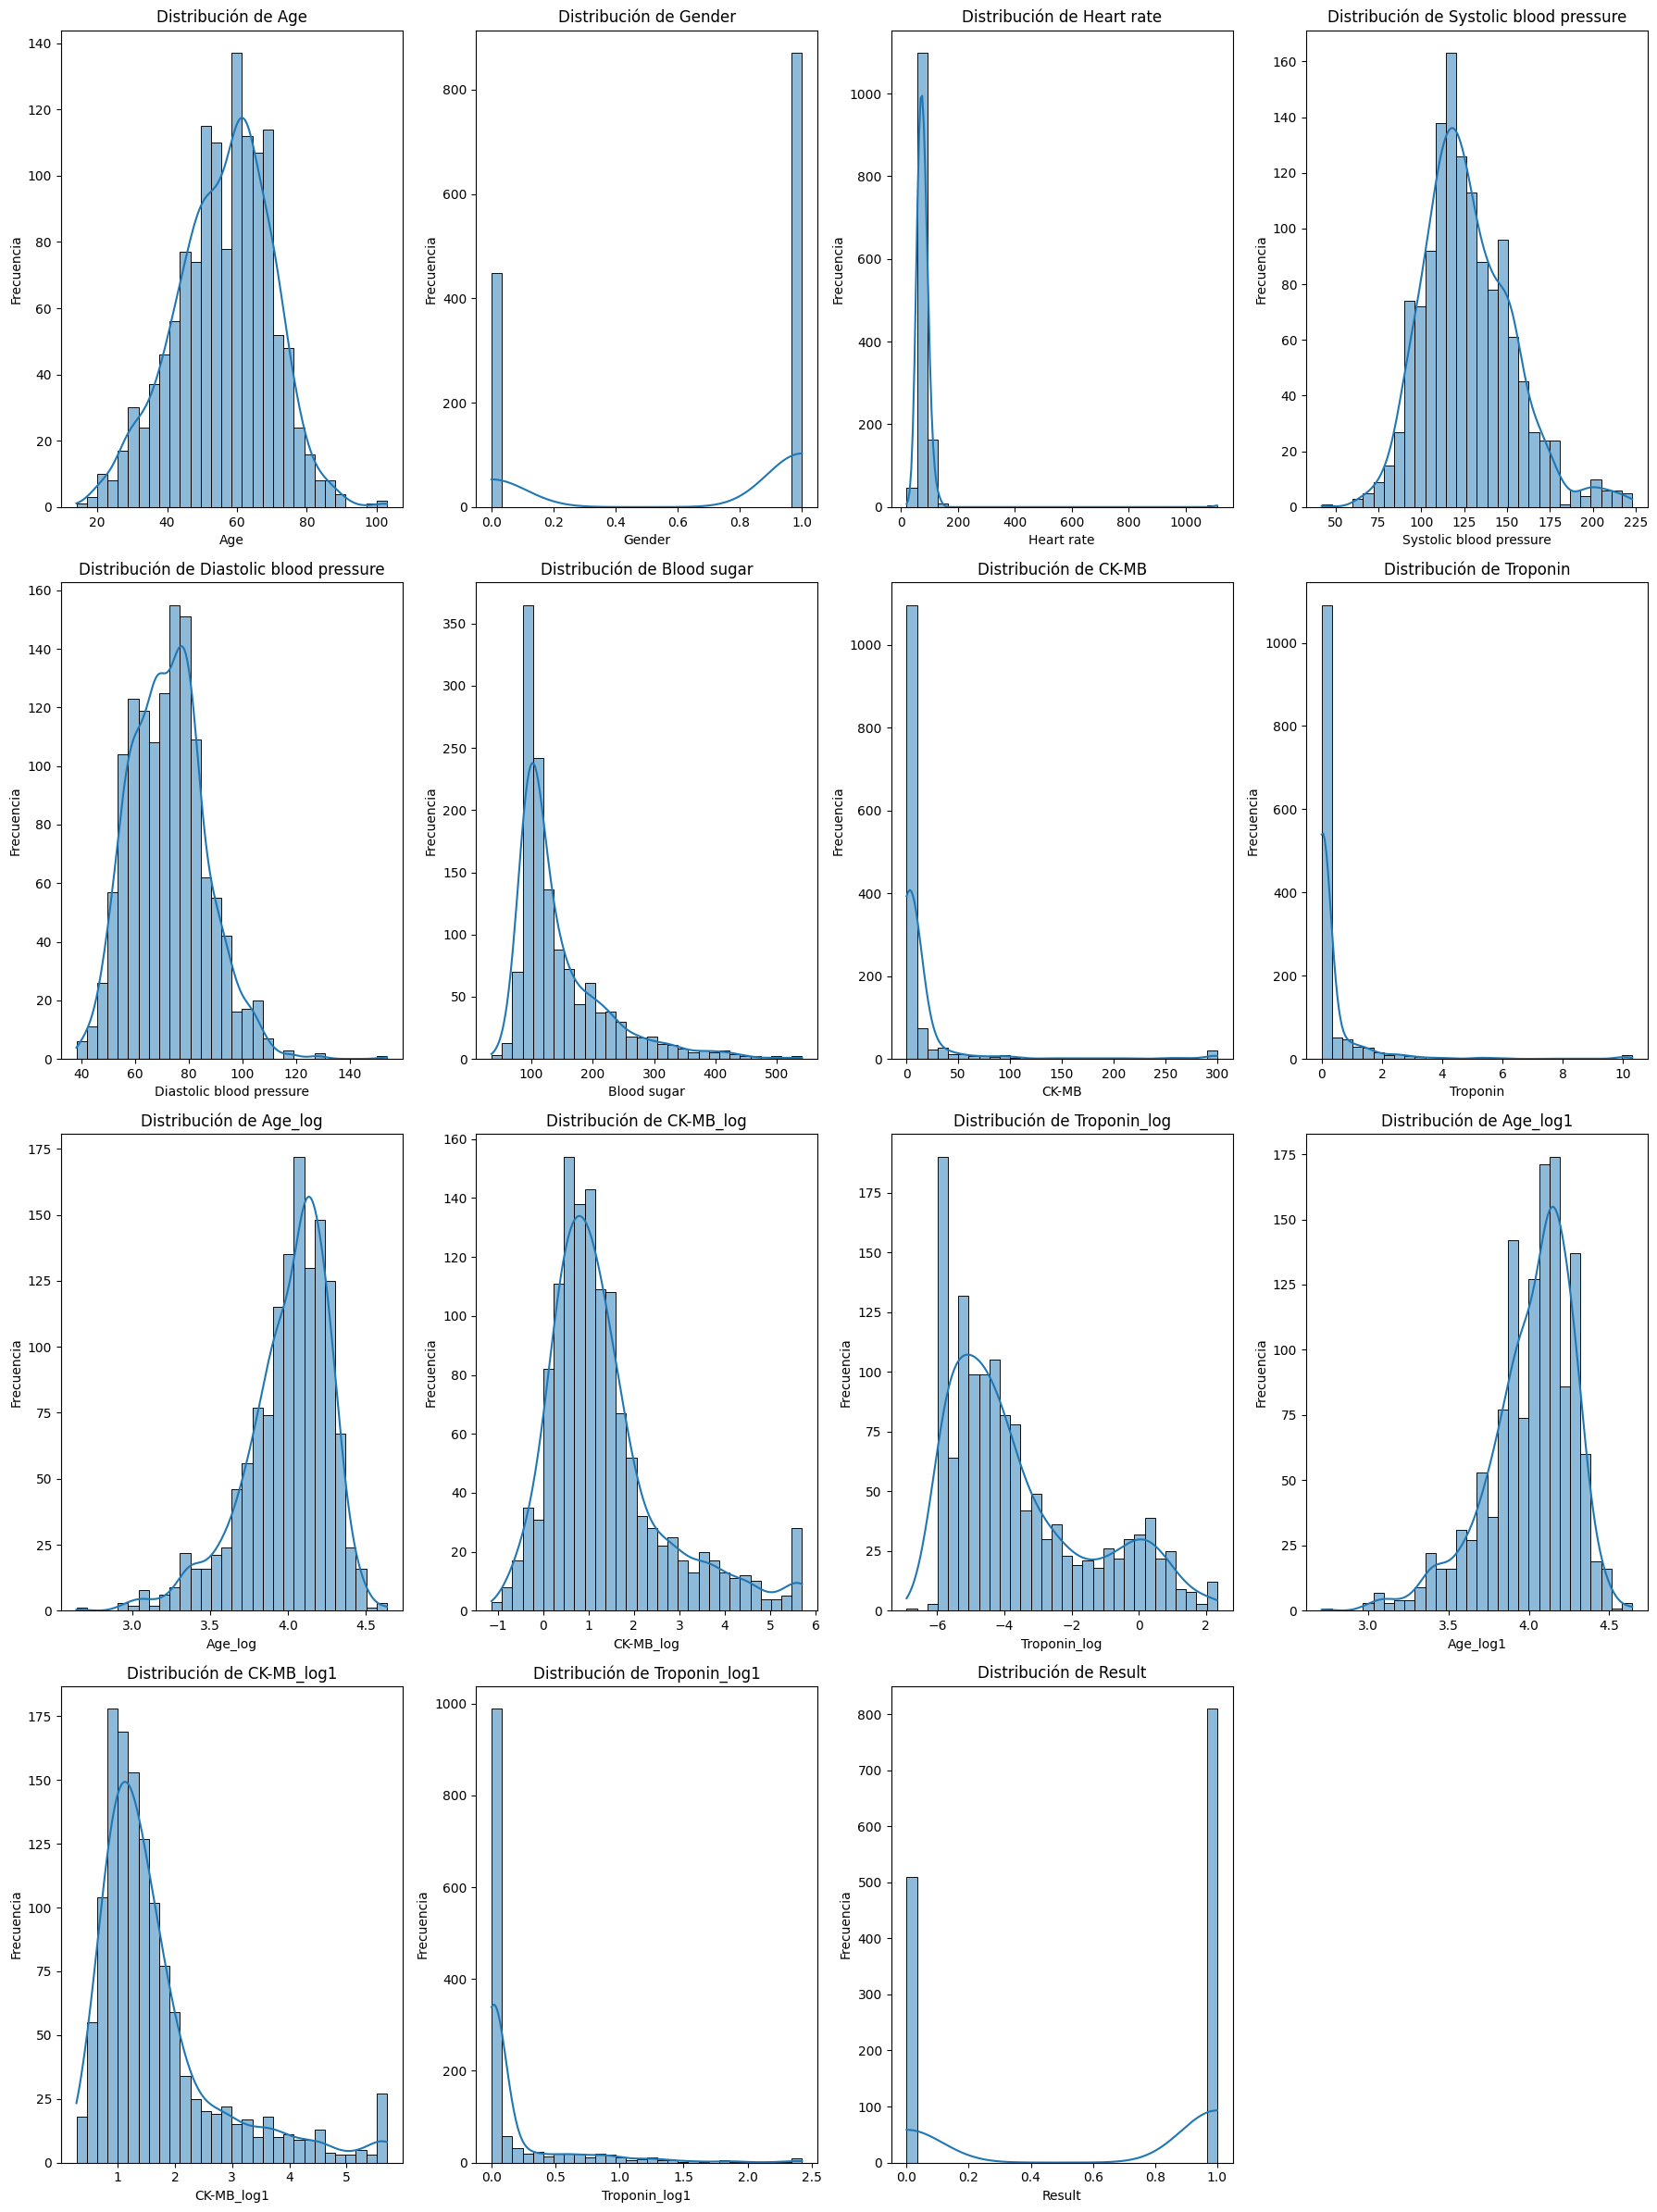

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables a analizar
variables = df.columns

# Crear la figura con subgráficas
ncols = 4  # Número de columnas por fila
nrows = (len(variables) + ncols - 1) // ncols  # Calcular el número de filas necesarias


# Crear la figura con subgráficas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 6))
# Aplanar los ejes en caso de que haya más de una fila
axes = axes.flatten()

# Graficar la distribución de cada variable en una subgráfica
for i, col in enumerate(variables):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

# Eliminar los ejes vacíos si es que hay subgráficas adicionales
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

# Ajustar el layout para que no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [32]:
# exportar el dataset a csv con las columnas Age, CK-MB_log y Troponin_log y Result
df_final = df[['Age', 'CK-MB_log', 'Troponin_log', 'Result']]
df_final.to_csv('dataset_final.csv', index=False)

In [35]:
# imprmir age, CK-MB, CK-MB_log, Troponin, Troponin_log y Result
prueba = pd.DataFrame(df[['Age', 'CK-MB', 'CK-MB_log', 'Troponin', 'Troponin_log', 'Result']])

In [36]:
prueba.describe()

,Age,CK-MB,CK-MB_log,Troponin,Troponin_log,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,15.274306,1.354888,0.360942,-3.579742,0.614102
std,13.647315,46.327083,1.303636,1.154568,2.105725,0.486991
min,14.000000,0.321000,-1.136314,0.001000,-6.907755,0.000000
25%,47.000000,1.655000,0.503796,0.006000,-5.115996,0.000000
50%,58.000000,2.850000,1.047319,0.014000,-4.268698,1.000000
75%,65.000000,5.805000,1.758719,0.085500,-2.459256,1.000000
max,103.000000,300.000000,5.703782,10.300000,2.332144,1.000000


In [50]:
prueba.sample(1)

,Age,CK-MB,CK-MB_log,Troponin,Troponin_log,Result
1131,57,0.89,-0.116534,5.4,1.686399,1


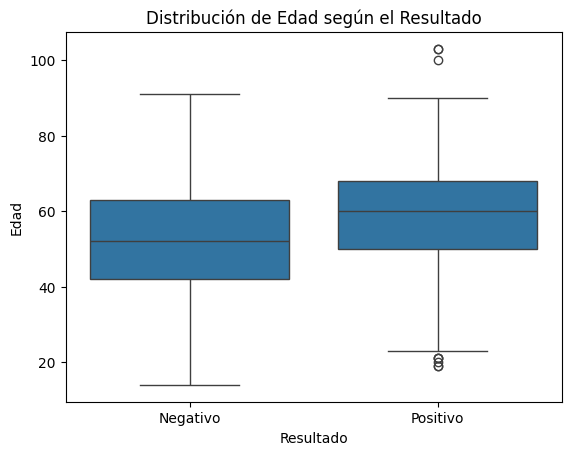

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Result', y='Age', data=df)
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.title("Distribución de Edad según el Resultado")
plt.xlabel("Resultado")
plt.ylabel("Edad")
plt.show()


C:\Users\eliut\AppData\Local\Temp\ipykernel_39860\2073067555.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion = df.groupby('Edad_rango')['Result'].mean().reset_index()


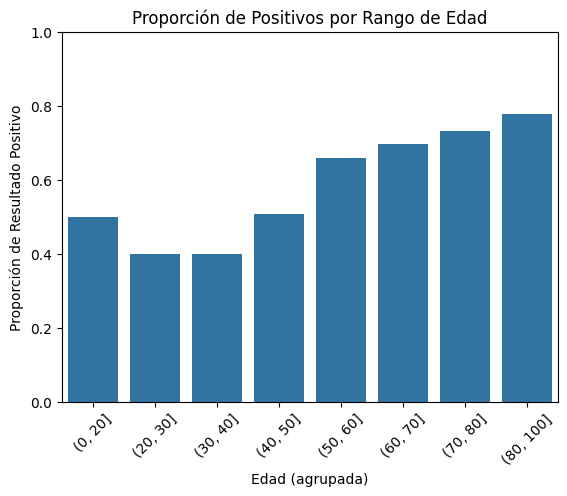

In [53]:
import pandas as pd

# Crear rangos de edad
df['Edad_rango'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 100])

# Calcular proporción de positivos por grupo
proporcion = df.groupby('Edad_rango')['Result'].mean().reset_index()

# Graficar
sns.barplot(x='Edad_rango', y='Result', data=proporcion)
plt.xticks(rotation=45)
plt.title("Proporción de Positivos por Rango de Edad")
plt.ylabel("Proporción de Resultado Positivo")
plt.xlabel("Edad (agrupada)")
plt.ylim(0, 1)
plt.show()



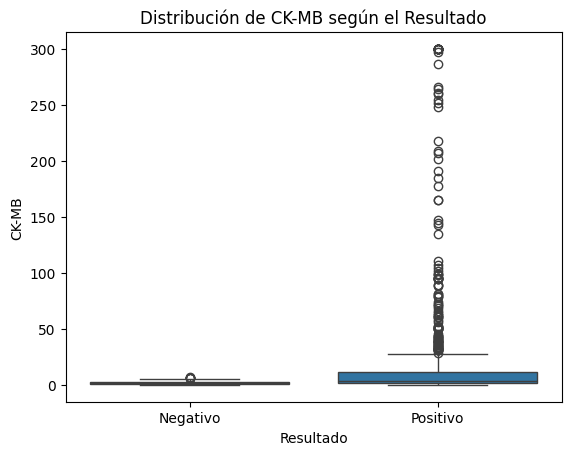

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Result', y='CK-MB', data=df)
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.title("Distribución de CK-MB según el Resultado")
plt.xlabel("Resultado")
plt.ylabel("CK-MB")
plt.show()

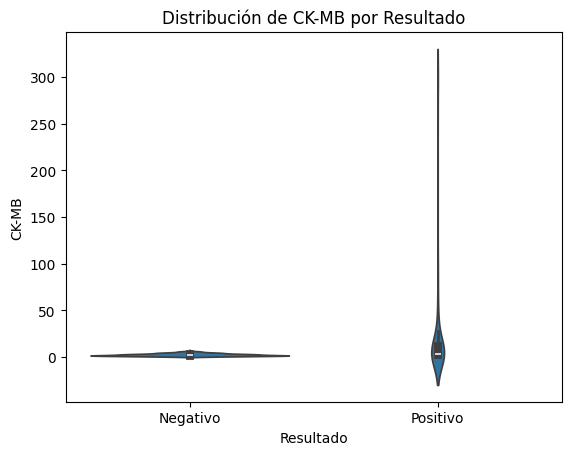

In [62]:
sns.violinplot(x='Result', y='CK-MB', data=df)
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.title("Distribución de CK-MB por Resultado")
plt.xlabel("Resultado")
plt.ylabel("CK-MB")
plt.show()


C:\Users\eliut\AppData\Local\Temp\ipykernel_39860\3658366945.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion = df.groupby('CKMB_rango')['Result'].mean().reset_index()


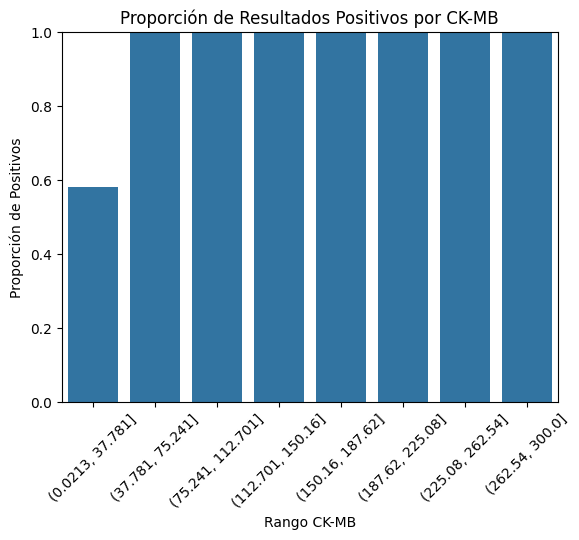

In [65]:
import pandas as pd

# Agrupar CK-MB log en rangos
df['CKMB_rango'] = pd.cut(df['CK-MB'], bins=8)

# Calcular proporción de positivos por rango
proporcion = df.groupby('CKMB_rango')['Result'].mean().reset_index()

# Graficar
sns.barplot(x='CKMB_rango', y='Result', data=proporcion)
plt.xticks(rotation=45)
plt.title("Proporción de Resultados Positivos por CK-MB")
plt.xlabel("Rango CK-MB")
plt.ylabel("Proporción de Positivos")
plt.ylim(0, 1)
plt.show()


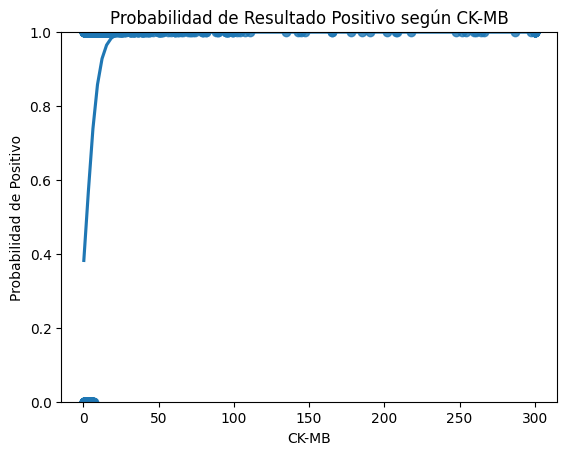

In [66]:
sns.regplot(x='CK-MB', y='Result', data=df, logistic=True, ci=None)
plt.title("Probabilidad de Resultado Positivo según CK-MB")
plt.xlabel("CK-MB")
plt.ylabel("Probabilidad de Positivo")
plt.ylim(0, 1)
plt.show()


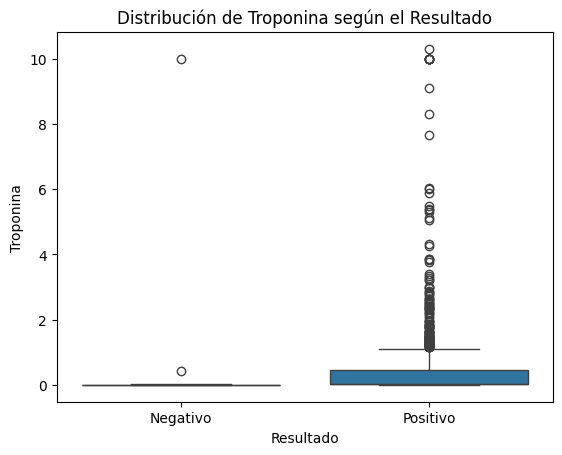

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Result', y='Troponin', data=df)
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.title("Distribución de Troponina según el Resultado")
plt.xlabel("Resultado")
plt.ylabel("Troponina")
plt.show()
